# Dataset Background

Stock prices changing can be caused by different events in the world, so the stock prediction through news could normally affect individuals decision of  buying stock.  

+ News Data:  
    * Daily top 25 headlines from Reddit WorldNews Channel, ranked by reddit users’ votes. (Range: 2008-06-08 to 2016-07-01)  
+ Stock Data: 
    * Dow Jones Industrial Average(DJIA) (Range: 2008-08-08 to 2016-07-01)  
+ Build a binary classification problem:  
    * “1” when DJIA Adj Close value rose or stayed as the same  
    * “0” when DJIA Adj Close value decreased  
+ Data Source: https://www.kaggle.com/aaron7sun/stocknews/data



# Python Library 

In [2]:
# Dataframe
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import date

# Data Preprocessing
# Make sure conda has nltk pacakge
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

# Evaluation Metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc,precision_score, accuracy_score, recall_score, f1_score
from scipy import interp

# Word Count & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Model Selection
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud # Need pip install wordcloud first
import matplotlib
matplotlib.rcParams["figure.figsize"] = "8, 8"
import re

# Data Import

In [3]:
# Data Import
df = pd.read_csv('/Users/DylanC/Desktop/stocknews/Combined_News_DJIA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()
# Label variable: 1 if the DJIA stayed the same or rose on that date
#                 0 if the DJIA decreased on that date

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
# Train data (2008-08-08 to 2014-12-31)
train = df.loc[(pd.to_datetime(df["Date"]) <= date(2014,12,31))]
train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# Test data (2015-01-02 to 2016-07-01)
test = df.loc[(pd.to_datetime(df["Date"]) > date(2014,12,31))]
test.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1611,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
1612,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps
1613,2015-01-06,0,US oil falls below $50 a barrel,"Toyota gives away 5,680 fuel cell patents to b...",Young Indian couple who had been granted polic...,A senior figure in Islamic States self-declare...,Fukushima rice passes radiation tests for 1st ...,Nearly all Spanish parties guilty of financial...,King Abdullah to abdicate Saudi Throne,Taliban Commander Caught Networking On LinkedIn,...,Thousands of Indians have fled from their home...,Turkey sacks judges who oversaw Erdogan corrup...,SpaceX Falcon 9 launch and recovery has been a...,CNN: Americans charged in botched Gambia coup,Islamic State 'Police' Official Beheaded.,Libya bans Palestinians from country to preven...,A judicial inquiry was opened in France on Mon...,Video has captured the moment a cameraman was ...,Syria has complained to the United Nations tha...,"Tests over, India set to make the iris of bigg..."
1614,2015-01-07,1,'Shots fired' at French magazine HQ,90% of Bibi Netanyahus Campaign Funds From U.S.,ISIS behead street magician for entertaining c...,Denmark sets new world record in renewable ene...,"ISIS Closes Schools In Syria, Leaving 670000 C...",The European Union wants Turkey to explain how...,10 people have died in a shooting at the headq...,Most Earth-like planet ever discovered could b...,...,Discovery of witnesss mutilated body feeds cla...,Radical Islam a growing threat to sub-Saharan ...,Tony Blair may 'face war crime charges' over I...,Benjamin Netanyahu says settlements unlikely t...,Tasmania moves to allow corporations to sue pr...,Indonesia search chief: Tail section of AirAsi...,"North Korean Defector: ""Bureau 121"" Hackers lo...",Female suicide bomber attacks police station i...,IS to turn Syria schools into religious indoct...,Ebola vaccine trials in Halifax so far a success
1615,2015-01-08,1,New Charlie Hebdo issue to come out next week:...,"Ahmed Merabet, Cop Killed In Paris Attacks, Wa...",Youngest Suspect in Charlie Hebdo Attack Turns...,"Grenades thrown at a mosque in Le Mans, west o...",Danish newspaper to print Charlie Hebdo cartoo...,M

# ROC Curves Metric

In [6]:
# ROC Curves metric
'''
    Plot ROC curves for the multiclass problem
    based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
'''
def ROCCurves (Actual, Predicted):
    
    # Compute ROC curve and ROC area for each class
    n_classes = 2
    fpr = dict()
    tpr = dict()
    roc_auc= dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Actual.values, Predicted)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Actual.ravel(), Predicted.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    ##############################################################################
    # Plot ROC curves for the multiclass problem

    # Compute macro-average ROC curve and ROC area

    # First aggregate all False Positive Rates

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at this points (include FPR, TPR)
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr[1], tpr[1], label = 'ROC curve of class (area = {1:0.2f})'
                                   ''.format(i, roc_auc[1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")

# Evaluation Model

In [7]:
# List to keep different methods scores to compare
ScoreSummaryByMethod = []

# Evaluation Model build for analyzing model performance
'''
    Prints and plots
    - classification report
    - confusion matrix
    - ROC-AUC
'''
def Evaluation (Method,Comment,Actual, Predicted):

    print (Method)
    print (Comment)
    print (classification_report(Actual,Predicted))
    print ('Confussion matrix:\n', confusion_matrix(Actual,Predicted))
    ROC_AUC = roc_auc_score(Actual,Predicted)
    print ('ROC-AUC: ' + str(ROC_AUC))
    
    Precision = precision_score(Actual,Predicted)
    Accuracy = accuracy_score(Actual,Predicted)
    Recall = recall_score(Actual,Predicted)
    F1 = f1_score(Actual,Predicted)
    ScoreSummaryByMethod.append([Method,Comment,ROC_AUC,Precision,Accuracy,Recall,F1])

# Text Preprocessing

In [8]:
# Text preprocessing:
'''
1. Tokenizes
2. Removes stopwords and coverts headlines to lowercase letters
3. Stems
4. Returns a list of the cleaned text
'''

def text_process(text):
    if pd.isnull(text):
        return []
    
    # Tokenizes with RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    # Removes any stopwords such as , . ; 
    # Coverts headlines to lowercase letters
    text_processed = [word.lower() for word in text_processed if word.lower() not in stopwords.words('english')]
    
    # Stems
    porter_stemmer = PorterStemmer()
    
    text_processed = [porter_stemmer.stem(word) for word in text_processed]
    
    try:
        text_processed.remove('b')
    except: 
        pass
    
    # Returns a list of the cleaned text
    return text_processed

# Bag of Words (N-gram Model) & TF-IDF Intro

# Feature Engineering

In [9]:
# Combine Top 3, Top 10, Top 25 headlines
df['Combined3']= df.iloc[:, 2:5].apply(lambda row: ''.join(str(row.values)), axis=1)
df['Combined10']= df.iloc[:, 2:12].apply(lambda row: ''.join(str(row.values)), axis=1)
df['Combined25']= df.iloc[:, 2:27].apply(lambda row: ''.join(str(row.values)), axis=1)
# Test combined 25 headlines
print(df['Combined25'][1])

["b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"
 "b'Bush puts foot down on Georgian conflict'"
 'b"Jewish Georgian minister: Thanks to Israeli training, we\'re fending off Russia "'
 "b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired'"
 'b"Olympic opening ceremony fireworks \'faked\'"'
 "b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?'"
 "b'Russia angered by Israeli military sale to Georgia'"
 "b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people'"
 "b'Welcome To World War IV! Now In High Definition!'"
 'b"Georgia\'s move, a mistake of monumental proportions "'
 "b'Russia presses deeper into Georgia; U.S. says regime change is goal'"
 "b'Abhinav Bindra wins first ever Individual Olympic Gold Medal for India'"
 "b' U.S. ship heads for Arctic to define territory'"
 "b'Drivers in a Jerusalem taxi station 

In [10]:
df.iloc[:, 2:5].head()

,Top1,Top2,Top3
0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...
1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ..."
2,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav..."
3,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...
4,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...


In [11]:
df.iloc[:, 2:5].apply(lambda row: ''.join(str(row.values)), axis=1)

0       ['b"Georgia \'downs two Russian warplanes\' as...
1       ["b'Why wont America and Nato help us? If they...
2       ["b'Remember that adorable 9-year-old who sang...
3       ["b' U.S. refuses Israel weapons to attack Ira...
4       ["b'All the experts admit that we should legal...
5       ['b"Mom of missing gay man: Too bad he\'s not ...
6       ["b'In an Afghan prison, the majority of femal...
7       ['b"Man arrested and locked up for five hours ...
8       ["b'Two elderly Chinese women have been senten...
9       ['b"British resident held in Guantanamo Bay wi...
10      ["b'Syria says its ready to put a Russian miss...
11      ['b"N Korea\'s Kim died in 2003; replaced by l...
12      ["b'North Korea halts denuclearisation after U...
13      ["b'Photos of a 15-year-old Iraqi suicide bomb...
14      ['b"Military help for Georgia is a \'declarati...
15      ["b'Russian Prime Minister Vladimir Putin has ...
16      ['b"A girl filmed Israeli soldiers\' brutality...
17      ["b'Po

In [12]:
df.iloc[:, 2:5].apply(lambda row: str(row.values), axis=1).head(8)

0    ['b"Georgia \'downs two Russian warplanes\' as...
1    ["b'Why wont America and Nato help us? If they...
2    ["b'Remember that adorable 9-year-old who sang...
3    ["b' U.S. refuses Israel weapons to attack Ira...
4    ["b'All the experts admit that we should legal...
5    ['b"Mom of missing gay man: Too bad he\'s not ...
6    ["b'In an Afghan prison, the majority of femal...
7    ['b"Man arrested and locked up for five hours ...
dtype: object

In [18]:
# New train and test data for later feature selection
# Train data (2008-08-08 to 2014-12-31)
train = df.loc[(pd.to_datetime(df["Date"]) <= date(2014,12,31)),['Label','Combined3','Combined10','Combined25']]
# Train data (2008-08-08 to 2014-12-31)
test = df.loc[(pd.to_datetime(df["Date"]) > date(2014,12,31)),['Label','Combined3','Combined10','Combined25']]

train.head()

,Label,Combined3,Combined10,Combined25
0,0,"['b""Georgia \'downs two Russian warplanes\' as...","['b""Georgia \'downs two Russian warplanes\' as...","['b""Georgia \'downs two Russian warplanes\' as..."
1,1,"[""b'Why wont America and Nato help us? If they...","[""b'Why wont America and Nato help us? If they...","[""b'Why wont America and Nato help us? If they..."
2,0,"[""b'Remember that adorable 9-year-old who sang...","[""b'Remember that adorable 9-year-old who sang...","[""b'Remember that adorable 9-year-old who sang..."
3,0,"[""b' U.S. refuses Israel weapons to attack Ira...","[""b' U.S. refuses Israel weapons to attack Ira...","[""b' U.S. refuses Israel weapons to attack Ira..."
4,1,"[""b'All the experts admit that we should legal...","[""b'All the experts admit that we should legal...","[""b'All the experts admit that we should legal..."


In [19]:
# Logestic Regression with ngram = (1, 1), Top 3 News
lr_1n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process,ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_1n_t3_pipeline.fit(train['Combined3'],train['Label'])
lr_1n_t3_prediction = lr_1n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Logestic Regression','ngram= (1,1), Top 3 News', test["Label"], lr_1n_t3_prediction) 

Logestic Regression
ngram= (1,1), Top 3 News
             precision    recall  f1-score   support

          0       0.43      0.22      0.29       186
          1       0.49      0.72      0.58       192

avg / total       0.46      0.47      0.44       378

Confussion matrix:
 [[ 40 146]
 [ 53 139]]
ROC-AUC: 0.46950604838709686


In [21]:
lr_1n_t3_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

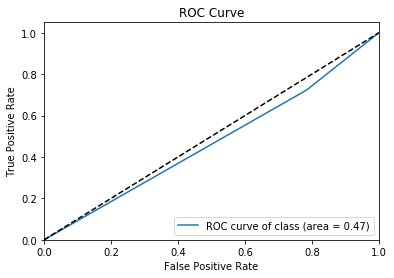

In [30]:
ROCCurves (test["Label"], lr_1n_t3_prediction)

In [23]:
# Logestic Regression with ngram = (1, 1), Top 10 News
lr_1n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process,ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_1n_t10_pipeline.fit(train['Combined10'],train['Label'])
lr_1n_t10_prediction = lr_1n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Logestic Regression','ngram= (1,1), Top 10 News', test["Label"], lr_1n_t10_prediction) 

Logestic Regression
ngram= (1,1), Top 10 News
             precision    recall  f1-score   support

          0       0.47      0.18      0.26       186
          1       0.50      0.80      0.62       192

avg / total       0.48      0.49      0.44       378

Confussion matrix:
 [[ 34 152]
 [ 39 153]]
ROC-AUC: 0.48983534946236557


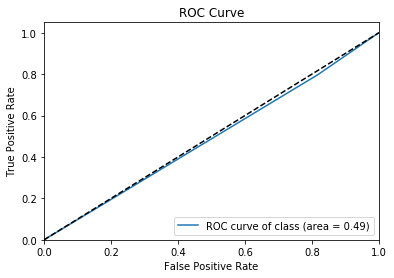

In [24]:
ROCCurves (test["Label"], lr_1n_t10_prediction)

In [25]:
# Logestic Regression with ngram = (1, 1), Top 25 News
lr_1n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process,ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_1n_t25_pipeline.fit(train['Combined25'],train['Label'])
lr_1n_t25_prediction = lr_1n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Logestic Regression','ngram= (1,1), Top 25 News', test["Label"], lr_1n_t25_prediction) 

Logestic Regression
ngram= (1,1), Top 25 News
             precision    recall  f1-score   support

          0       0.48      0.11      0.18       186
          1       0.51      0.89      0.64       192

avg / total       0.49      0.50      0.41       378

Confussion matrix:
 [[ 20 166]
 [ 22 170]]
ROC-AUC: 0.4964717741935484


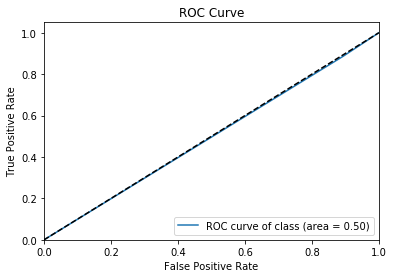

In [26]:
ROCCurves (test["Label"], lr_1n_t25_prediction)

In [27]:
# Logestic Regression with ngram = (2, 2), Top 3 News
lr_2n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.97, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_2n_t3_pipeline.fit(train['Combined3'],train['Label'])
lr_2n_t3_prediction = lr_2n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Logestic Regression','ngram= (2,2), Top 3 News', test["Label"], lr_2n_t3_prediction) 

Logestic Regression
ngram= (2,2), Top 3 News
             precision    recall  f1-score   support

          0       0.46      0.32      0.37       186
          1       0.49      0.64      0.55       192

avg / total       0.47      0.48      0.47       378

Confussion matrix:
 [[ 59 127]
 [ 70 122]]
ROC-AUC: 0.47631048387096775


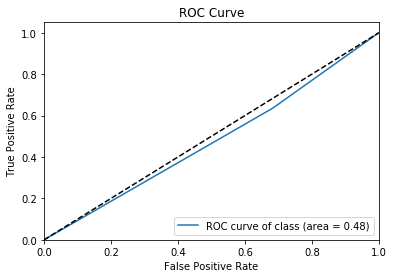

In [28]:
ROCCurves (test["Label"], lr_2n_t3_prediction)

In [29]:
# Logestic Regression with ngram = (2, 2), Top 10 News
lr_2n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.97, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_2n_t10_pipeline.fit(train['Combined10'],train['Label'])
lr_2n_t10_prediction = lr_2n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Logestic Regression','ngram= (2,2), Top 10 News', test["Label"], lr_2n_t10_prediction) 

Logestic Regression
ngram= (2,2), Top 10 News
             precision    recall  f1-score   support

          0       0.44      0.30      0.35       186
          1       0.48      0.63      0.55       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 55 131]
 [ 71 121]]
ROC-AUC: 0.4629536290322581


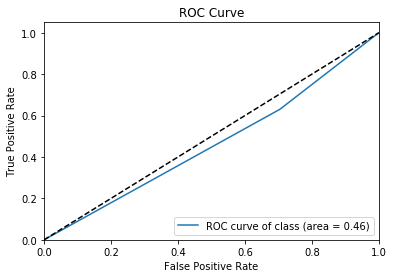

In [31]:
ROCCurves (test["Label"], lr_2n_t10_prediction)

In [32]:
# Logestic Regression with ngram = (2, 2), Top 25 News
lr_2n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.97, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_2n_t25_pipeline.fit(train['Combined25'],train['Label'])
lr_2n_t25_prediction = lr_2n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Logestic Regression','ngram= (2,2), Top 25 News', test["Label"], lr_2n_t25_prediction) 

Logestic Regression
ngram= (2,2), Top 25 News
             precision    recall  f1-score   support

          0       0.43      0.19      0.26       186
          1       0.49      0.76      0.60       192

avg / total       0.46      0.48      0.43       378

Confussion matrix:
 [[ 35 151]
 [ 46 146]]
ROC-AUC: 0.4742943548387097


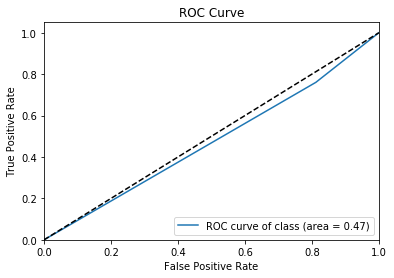

In [33]:
ROCCurves (test["Label"], lr_2n_t25_prediction)

In [34]:
# Logestic Regression with ngram = (3, 3), Top 3 News
lr_3n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_3n_t3_pipeline.fit(train['Combined3'],train['Label'])
lr_3n_t3_prediction = lr_3n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Logestic Regression','ngram= (3,3), Top 3 News', test["Label"], lr_3n_t3_prediction) 

Logestic Regression
ngram= (3,3), Top 3 News
             precision    recall  f1-score   support

          0       0.44      0.26      0.33       186
          1       0.49      0.68      0.57       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 48 138]
 [ 61 131]]
ROC-AUC: 0.47017809139784944


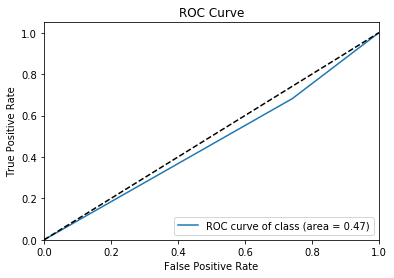

In [35]:
ROCCurves (test["Label"], lr_3n_t3_prediction)

In [36]:
# Logestic Regression with ngram = (3, 3), Top 10 News
lr_3n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_3n_t10_pipeline.fit(train['Combined10'],train['Label'])
lr_3n_t10_prediction = lr_3n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Logestic Regression','ngram= (3,3), Top 10 News', test["Label"], lr_3n_t10_prediction) 

Logestic Regression
ngram= (3,3), Top 10 News
             precision    recall  f1-score   support

          0       0.50      0.26      0.35       186
          1       0.51      0.74      0.61       192

avg / total       0.51      0.51      0.48       378

Confussion matrix:
 [[ 49 137]
 [ 49 143]]
ROC-AUC: 0.5041162634408601


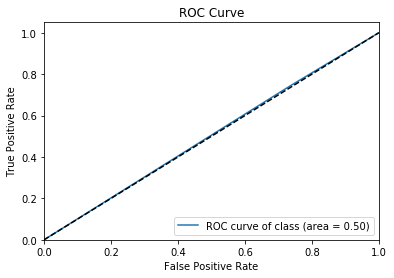

In [37]:
ROCCurves (test["Label"], lr_3n_t10_prediction)

In [38]:
# Logestic Regression with ngram = (3, 3), Top 25 News
lr_3n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
lr_3n_t25_pipeline.fit(train['Combined25'],train['Label'])
lr_3n_t25_prediction = lr_3n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Logestic Regression','ngram= (3,3), Top 25 News', test["Label"], lr_3n_t25_prediction) 

Logestic Regression
ngram= (3,3), Top 25 News
             precision    recall  f1-score   support

          0       0.46      0.13      0.21       186
          1       0.50      0.85      0.63       192

avg / total       0.48      0.50      0.42       378

Confussion matrix:
 [[ 25 161]
 [ 29 163]]
ROC-AUC: 0.4916834677419355


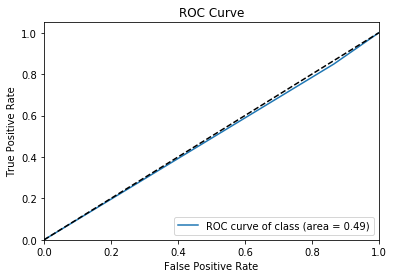

In [39]:
ROCCurves (test["Label"], lr_3n_t25_prediction)

In [40]:
# Bernoulli Naive Bayes with ngram = (1, 1), Top 3 News
bnb_1n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.1, max_df = 0.7, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_1n_t3_pipeline.fit(train['Combined3'],train['Label'])
bnb_1n_t3_prediction = bnb_1n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Bernoulli Naive Bayes','ngram= (1,1), Top 3 News', test["Label"], bnb_1n_t3_prediction)  

Bernoulli Naive Bayes
ngram= (1,1), Top 3 News
             precision    recall  f1-score   support

          0       0.56      0.08      0.13       186
          1       0.51      0.94      0.66       192

avg / total       0.54      0.52      0.40       378

Confussion matrix:
 [[ 14 172]
 [ 11 181]]
ROC-AUC: 0.5089885752688172


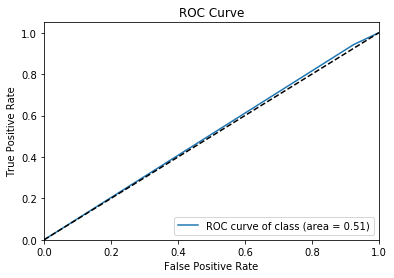

In [41]:
ROCCurves (test["Label"], bnb_1n_t3_prediction)

In [42]:
# Bernoulli Naive Bayes with ngram = (1, 1), Top 10 News
bnb_1n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.1, max_df = 0.7, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_1n_t10_pipeline.fit(train['Combined10'],train['Label'])
bnb_1n_t10_prediction = bnb_1n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Bernoulli Naive Bayes','ngram= (1,1), Top 10 News', test["Label"], bnb_1n_t10_prediction) 

Bernoulli Naive Bayes
ngram= (1,1), Top 10 News
             precision    recall  f1-score   support

          0       0.44      0.30      0.36       186
          1       0.48      0.62      0.54       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 56 130]
 [ 72 120]]
ROC-AUC: 0.46303763440860213


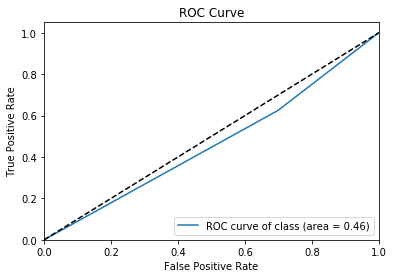

In [43]:
ROCCurves (test["Label"], bnb_1n_t10_prediction)

In [44]:
# Bernoulli Naive Bayes with ngram = (1, 1), Top 25 News
bnb_1n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.1, max_df = 0.7, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_1n_t25_pipeline.fit(train['Combined25'],train['Label'])
bnb_1n_t25_prediction = bnb_1n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Bernoulli Naive Bayes','ngram= (1,1), Top 25 News', test["Label"], bnb_1n_t25_prediction)     

Bernoulli Naive Bayes
ngram= (1,1), Top 25 News
             precision    recall  f1-score   support

          0       0.48      0.41      0.44       186
          1       0.50      0.57      0.53       192

avg / total       0.49      0.49      0.49       378

Confussion matrix:
 [[ 76 110]
 [ 82 110]]
ROC-AUC: 0.4907594086021505


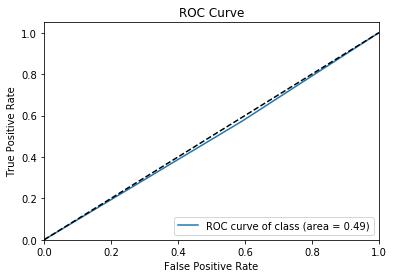

In [45]:
ROCCurves (test["Label"], bnb_1n_t25_prediction)

In [46]:
# Bernoulli Naive Bayes with ngram = (2, 2), Top 3 News
bnb_2n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_2n_t3_pipeline.fit(train['Combined3'],train['Label'])
bnb_2n_t3_prediction = bnb_2n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Bernoulli Naive Bayes','ngram= (2,2), Top 3 News', test["Label"], bnb_2n_t3_prediction)  

Bernoulli Naive Bayes
ngram= (2,2), Top 3 News
             precision    recall  f1-score   support

          0       0.49      0.38      0.43       186
          1       0.51      0.62      0.56       192

avg / total       0.50      0.50      0.49       378

Confussion matrix:
 [[ 70 116]
 [ 73 119]]
ROC-AUC: 0.498067876344086


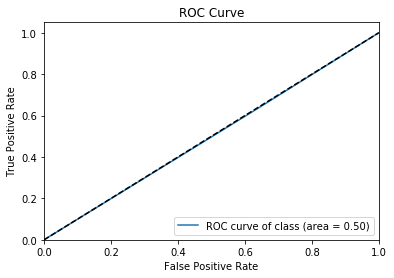

In [47]:
ROCCurves (test["Label"], bnb_2n_t3_prediction)

In [48]:
# Bernoulli Naive Bayes with ngram = (2, 2), Top 10 News
bnb_2n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_2n_t10_pipeline.fit(train['Combined10'],train['Label'])
bnb_2n_t10_prediction = bnb_2n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Bernoulli Naive Bayes','ngram= (2,2), Top 10 News', test["Label"], bnb_2n_t10_prediction) 

Bernoulli Naive Bayes
ngram= (2,2), Top 10 News
             precision    recall  f1-score   support

          0       0.44      0.41      0.42       186
          1       0.46      0.48      0.47       192

avg / total       0.45      0.45      0.45       378

Confussion matrix:
 [[ 77 109]
 [100  92]]
ROC-AUC: 0.4465725806451613


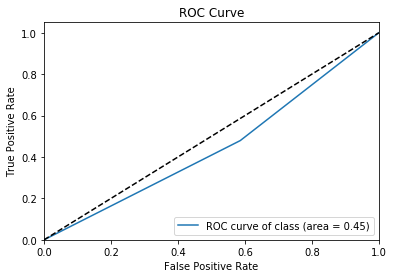

In [49]:
ROCCurves (test["Label"], bnb_2n_t10_prediction)

In [50]:
# Bernoulli Naive Bayes with ngram = (2, 2), Top 25 News
bnb_2n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_2n_t25_pipeline.fit(train['Combined25'],train['Label'])
bnb_2n_t25_prediction = bnb_2n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Bernoulli Naive Bayes','ngram= (2,2), Top 25 News', test["Label"], bnb_2n_t25_prediction) 

Bernoulli Naive Bayes
ngram= (2,2), Top 25 News
             precision    recall  f1-score   support

          0       0.47      0.35      0.41       186
          1       0.50      0.62      0.55       192

avg / total       0.49      0.49      0.48       378

Confussion matrix:
 [[ 66 120]
 [ 73 119]]
ROC-AUC: 0.487315188172043


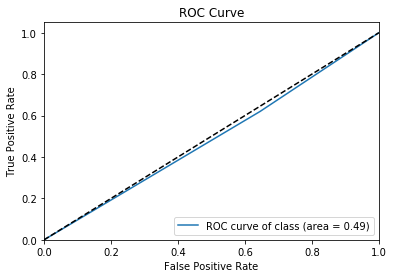

In [51]:
ROCCurves (test["Label"], bnb_2n_t25_prediction)

In [52]:
# Bernoulli Naive Bayes with ngram = (3, 3), Top 3 News
bnb_3n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_3n_t3_pipeline.fit(train['Combined3'],train['Label'])
bnb_3n_t3_prediction = bnb_3n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Bernoulli Naive Bayes','ngram= (3,3), Top 3 News', test["Label"], bnb_3n_t3_prediction)  

Bernoulli Naive Bayes
ngram= (3,3), Top 3 News
             precision    recall  f1-score   support

          0       0.49      0.41      0.45       186
          1       0.50      0.58      0.54       192

avg / total       0.50      0.50      0.49       378

Confussion matrix:
 [[ 77 109]
 [ 81 111]]
ROC-AUC: 0.4960517473118279


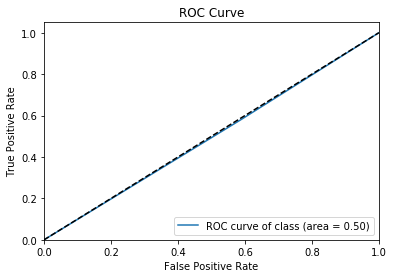

In [53]:
ROCCurves (test["Label"], bnb_3n_t3_prediction)

In [54]:
# Bernoulli Naive Bayes with ngram = (3, 3), no shift, Top 10 News
bnb_3n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_3n_t10_pipeline.fit(train['Combined10'],train['Label'])
bnb_3n_t10_prediction = bnb_3n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Bernoulli Naive Bayes','ngram= (3,3), Top 10 News', test["Label"], bnb_3n_t10_prediction)

Bernoulli Naive Bayes
ngram= (3,3), Top 10 News
             precision    recall  f1-score   support

          0       0.54      0.47      0.50       186
          1       0.54      0.60      0.57       192

avg / total       0.54      0.54      0.54       378

Confussion matrix:
 [[ 88  98]
 [ 76 116]]
ROC-AUC: 0.5386424731182795


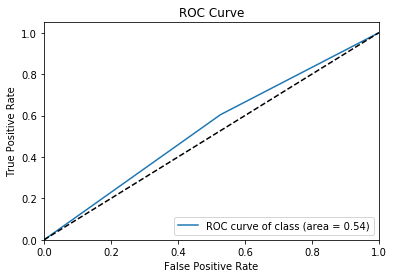

In [55]:
ROCCurves (test["Label"], bnb_3n_t10_prediction)

In [56]:
# Bernoulli Naive Bayes with ngram = (3, 3), no shift, Top 25 News
bnb_3n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB(alpha = 0.5, binarize = 0.0)),
])
bnb_3n_t25_pipeline.fit(train['Combined25'],train['Label'])
bnb_3n_t25_prediction = bnb_3n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Bernoulli Naive Bayes','ngram= (3,3), Top 25 News', test["Label"], bnb_3n_t25_prediction)

Bernoulli Naive Bayes
ngram= (3,3), Top 25 News
             precision    recall  f1-score   support

          0       0.44      0.30      0.35       186
          1       0.48      0.63      0.55       192

avg / total       0.46      0.47      0.45       378

Confussion matrix:
 [[ 55 131]
 [ 71 121]]
ROC-AUC: 0.4629536290322581


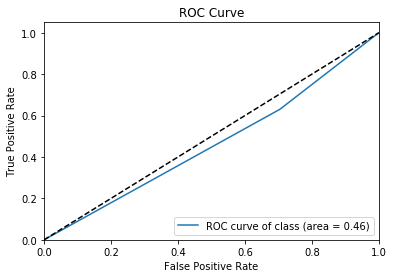

In [57]:
ROCCurves (test["Label"], bnb_3n_t25_prediction)

In [58]:
# Random Forest with ngram = (1, 1), Top 3 News
rf_1n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.01, max_df = 0.99, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_1n_t3_pipeline.fit(train['Combined3'],train['Label'])
rf_1n_t3_prediction = rf_1n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Random Forest','ngram= (1,1), Top 3 News', test["Label"], rf_1n_t3_prediction)  

Random Forest
ngram= (1,1), Top 3 News
             precision    recall  f1-score   support

          0       0.45      0.40      0.42       186
          1       0.48      0.54      0.51       192

avg / total       0.47      0.47      0.47       378

Confussion matrix:
 [[ 74 112]
 [ 89 103]]
ROC-AUC: 0.4671538978494624


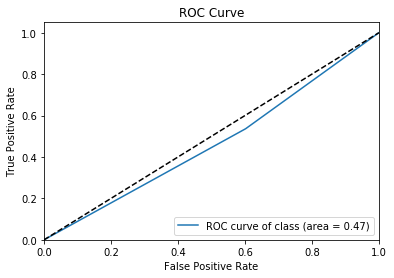

In [59]:
ROCCurves (test["Label"], rf_1n_t3_prediction)

In [60]:
# Random Forest with ngram = (1, 1), Top 10 News
rf_1n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.01, max_df = 0.99, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_1n_t10_pipeline.fit(train['Combined10'],train['Label'])
rf_1n_t10_prediction = rf_1n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Random Forest','ngram= (1,1), Top 10 News', test["Label"], rf_1n_t10_prediction) 

Random Forest
ngram= (1,1), Top 10 News
             precision    recall  f1-score   support

          0       0.52      0.28      0.37       186
          1       0.52      0.74      0.61       192

avg / total       0.52      0.52      0.49       378

Confussion matrix:
 [[ 53 133]
 [ 49 143]]
ROC-AUC: 0.5148689516129031


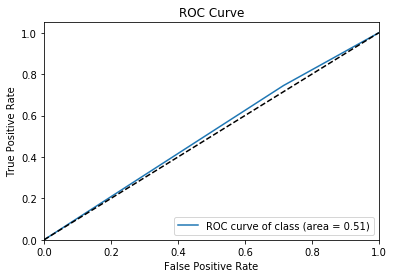

In [61]:
ROCCurves (test["Label"], rf_1n_t10_prediction)

In [62]:
# Random Forest with ngram = (1, 1), Top 25 News
rf_1n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.01, max_df = 0.99, max_features = 200000, ngram_range = (1, 1))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_1n_t25_pipeline.fit(train['Combined25'],train['Label'])
rf_1n_t25_prediction = rf_1n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Random Forest','ngram= (1,1), Top 25 News', test["Label"], rf_1n_t25_prediction) 

Random Forest
ngram= (1,1), Top 25 News
             precision    recall  f1-score   support

          0       0.48      0.16      0.24       186
          1       0.50      0.83      0.63       192

avg / total       0.49      0.50      0.44       378

Confussion matrix:
 [[ 30 156]
 [ 33 159]]
ROC-AUC: 0.49470766129032256


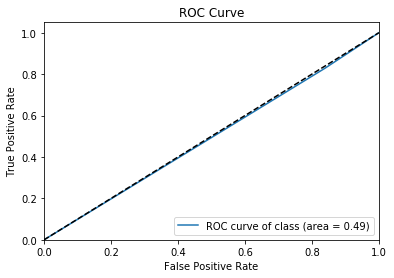

In [63]:
ROCCurves (test["Label"], rf_1n_t25_prediction)

In [64]:
# Random Forest with ngram = (2, 2), Top 3 News
rf_2n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_2n_t3_pipeline.fit(train['Combined3'],train['Label'])
rf_2n_t3_prediction = rf_2n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Random Forest','ngram= (2,2), Top 3 News', test["Label"], rf_2n_t3_prediction)  

Random Forest
ngram= (2,2), Top 3 News
             precision    recall  f1-score   support

          0       0.47      0.32      0.38       186
          1       0.50      0.65      0.56       192

avg / total       0.49      0.49      0.48       378

Confussion matrix:
 [[ 60 126]
 [ 67 125]]
ROC-AUC: 0.4868111559139785


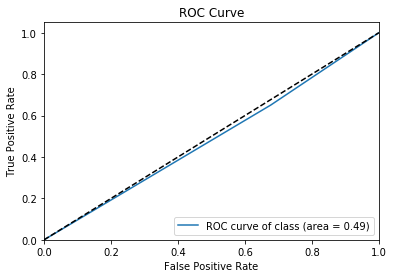

In [65]:
ROCCurves (test["Label"], rf_2n_t3_prediction)

In [66]:
# Random Forest with ngram = (2, 2), Top 10 News
rf_2n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_2n_t10_pipeline.fit(train['Combined10'],train['Label'])
rf_2n_t10_prediction = rf_2n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Random Forest','ngram= (2,2), Top 10 News', test["Label"], rf_2n_t10_prediction) 

Random Forest
ngram= (2,2), Top 10 News
             precision    recall  f1-score   support

          0       0.47      0.32      0.38       186
          1       0.50      0.66      0.57       192

avg / total       0.49      0.49      0.47       378

Confussion matrix:
 [[ 59 127]
 [ 66 126]]
ROC-AUC: 0.4867271505376345


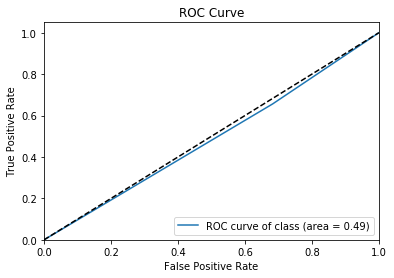

In [67]:
ROCCurves (test["Label"], rf_2n_t10_prediction)

In [68]:
# Random Forest with ngram = (2, 2), Top 25 News
rf_2n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.03, max_df = 0.2, max_features = 200000, ngram_range = (2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_2n_t25_pipeline.fit(train['Combined25'],train['Label'])
rf_2n_t25_prediction = rf_2n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Random Forest','ngram= (2,2), Top 25 News', test["Label"], rf_2n_t25_prediction) 

Random Forest
ngram= (2,2), Top 25 News
             precision    recall  f1-score   support

          0       0.49      0.22      0.30       186
          1       0.51      0.78      0.61       192

avg / total       0.50      0.50      0.46       378

Confussion matrix:
 [[ 40 146]
 [ 42 150]]
ROC-AUC: 0.4981518817204301


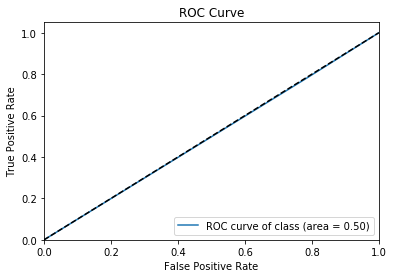

In [69]:
ROCCurves (test["Label"], rf_2n_t25_prediction)

In [70]:
# Random Forest with ngram = (3, 3), Top 3 News
rf_3n_t3_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_3n_t3_pipeline.fit(train['Combined3'],train['Label'])
rf_3n_t3_prediction = rf_3n_t3_pipeline.predict(test['Combined3'])
Evaluation ('Random Forest','ngram= (3,3), Top 3 News', test["Label"], rf_3n_t3_prediction)  

Random Forest
ngram= (3,3), Top 3 News
             precision    recall  f1-score   support

          0       0.42      0.34      0.38       186
          1       0.46      0.54      0.50       192

avg / total       0.44      0.44      0.44       378

Confussion matrix:
 [[ 64 122]
 [ 88 104]]
ROC-AUC: 0.4428763440860215


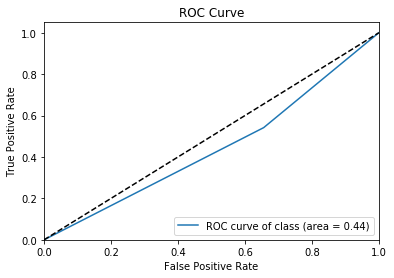

In [71]:
ROCCurves (test["Label"], rf_3n_t3_prediction)

In [72]:
# Random Forest with ngram = (3, 3), Top 10 News
rf_3n_t10_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_3n_t10_pipeline.fit(train['Combined10'],train['Label'])
rf_3n_t10_prediction = rf_3n_t10_pipeline.predict(test['Combined10'])
Evaluation ('Random Forest','ngram= (3,3), Top 10 News', test["Label"], rf_3n_t10_prediction) 

Random Forest
ngram= (3,3), Top 10 News
             precision    recall  f1-score   support

          0       0.45      0.34      0.39       186
          1       0.48      0.59      0.53       192

avg / total       0.47      0.47      0.46       378

Confussion matrix:
 [[ 64 122]
 [ 78 114]]
ROC-AUC: 0.4689180107526882


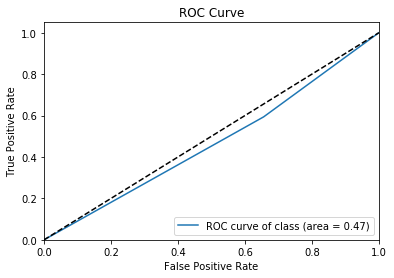

In [73]:
ROCCurves (test["Label"], rf_3n_t10_prediction)

In [74]:
# Random Forest with ngram = (3, 3), Top 25 News
rf_3n_t25_pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer = text_process, min_df = 0.0039, max_df = 0.1, max_features = 200000, ngram_range = (3, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=200)),
])
rf_3n_t25_pipeline.fit(train['Combined25'],train['Label'])
rf_3n_t25_prediction = rf_3n_t25_pipeline.predict(test['Combined25'])
Evaluation ('Random Forest','ngram= (3,3), Top 25 News', test["Label"], rf_3n_t25_prediction)     

Random Forest
ngram= (3,3), Top 25 News
             precision    recall  f1-score   support

          0       0.46      0.25      0.32       186
          1       0.50      0.72      0.59       192

avg / total       0.48      0.49      0.46       378

Confussion matrix:
 [[ 46 140]
 [ 54 138]]
ROC-AUC: 0.4830309139784946


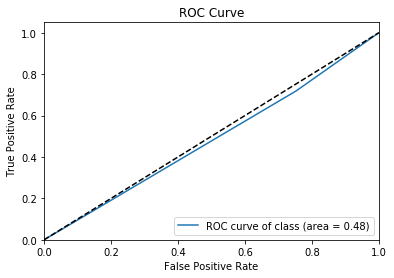

In [75]:
ROCCurves (test["Label"], rf_3n_t25_prediction)

In [76]:
# Show the top 20 model performance sorted on AUC performance
df_ScoreSummaryByMethod=DataFrame(ScoreSummaryByMethod,columns=['Method','Comment','ROC_AUC','Precision','Accuracy','Recall','F1'])
df_ScoreSummaryByMethod.sort_values(['ROC_AUC'],ascending=False,inplace=True)
df_ScoreSummaryByMethod.head(20)

,Method,Comment,ROC_AUC,Precision,Accuracy,Recall,F1
18,Bernoulli Naive Bayes,"ngram= (3,3), Top 10 News",0.538642,0.542056,0.539683,0.604167,0.571429
21,Random Forest,"ngram= (1,1), Top 10 News",0.514869,0.518116,0.518519,0.744792,0.611111
11,Bernoulli Naive Bayes,"ngram= (1,1), Top 3 News",0.508989,0.512748,0.515873,0.942708,0.664220
9,Logestic Regression,"ngram= (3,3), Top 10 News",0.504116,0.510714,0.507937,0.744792,0.605932
25,Random Forest,"ngram= (2,2), Top 25 News",0.498152,0.506757,0.502646,0.781250,0.614754
14,Bernoulli Naive Bayes,"ngram= (2,2), Top 3 News",0.498068,0.506383,0.500000,0.619792,0.557377
4,Logestic Regression,"ngram= (1,1), Top 25 News",0.496472,0.505952,0.502646,0.885417,0.643939
17,Bernoulli Naive Bayes,"ngram= (3,3), Top 3 News",0.496052,0.504545,0.497354,0.578125,0.538835
22,Random Forest,"ngram= (1,1), Top 25 News",0.494708,0.504762,0.500000,0.828125,0.627219
10,Logestic Regression,"ngram= (3,3), Top 25 News",0.491683,0.503086,0.497354,0.848958,0.631783


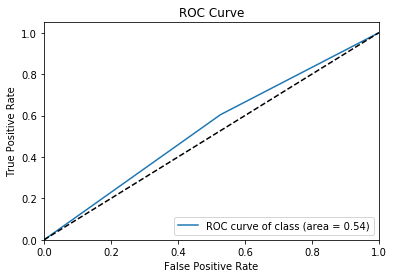

In [77]:
ROCCurves (test["Label"], bnb_3n_t10_prediction)

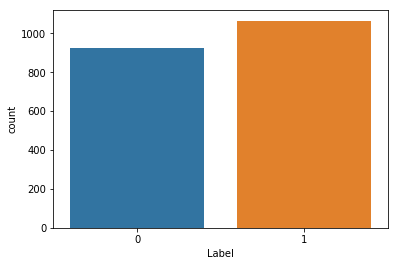

In [78]:
# Check the Label 1 and 0 proportion
sns.countplot(x='Label', data=df)

In [79]:
# Word preprocessing before doing word cloud
def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

df['Combined']=df.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)
non_down = df[df['Label']==1]
down = df[df['Label']==0]

non_down_word = []
down_word = []
for word in non_down['Combined']:
    non_down_word.append(to_words(word))
for word in down['Combined']:
    down_word.append(to_words(word))

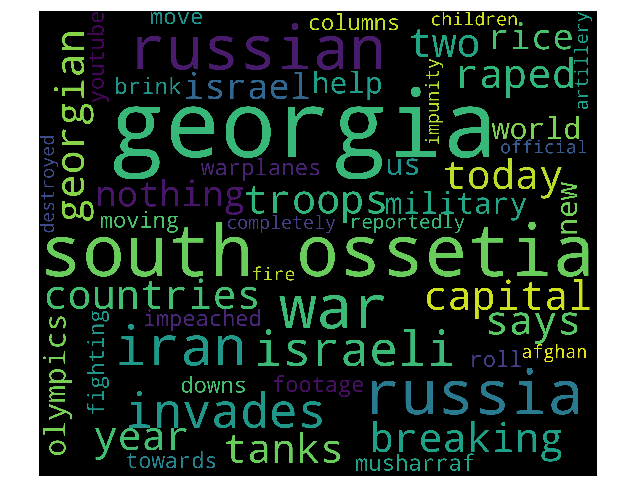

In [80]:
wordcloud_down = WordCloud(background_color='black',
                          width=3000,
                          height=2500,
                          max_words=50, 
                          ).generate(down_word[0])

plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud_down)
plt.axis('off')
plt.show()

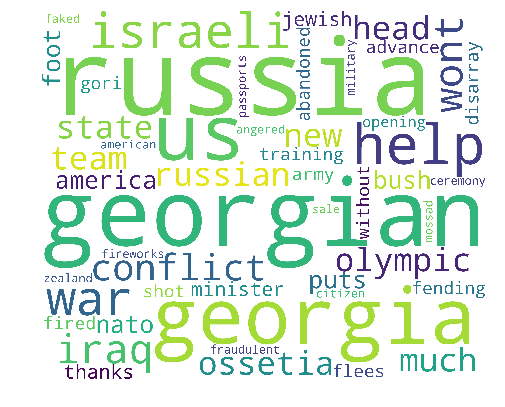

In [81]:
wordcloud_non = WordCloud(background_color='white',
                         width=3000,
                         height=2500,
                         max_words=50,
                         ).generate(non_down_word[0])
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_non)
plt.axis('off')
plt.show()